# **Курсовой проект для курса "Python для Data Science"**

## **Задание**

**Материалы к проекту (файлы):**
*   train.csv
*   test.csv

**Задание:** Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры). С помощью полученной модели предсказать цены для квартир из файла test.csv.

**Целевая переменная:** Price

**Метрика:** R2 - коэффициент детерминации (sklearn.metrics.r2_score)

**Сдача проекта:**
1. Прислать в раздел Задания Урока 10 ("Вебинар. Консультация по итоговому проекту") ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook с расширением ipynb). (Pull request не нужен, только ссылка ведущая на сам скрипт).
2. Приложить файл с названием по образцу SShirkin_predictions.csv с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price). В файле с предсказаниями должна быть 5001 строка (шапка + 5000 предсказаний).

**Сроки и условия сдачи:**

*   **Дедлайн:** сдать проект нужно в течение 72 часов после начала Урока 10 ("Вебинар. Консультация по итоговому проекту").
*   Для успешной сдачи должны быть все предсказания (для 5000 квартир) и R2 должен быть больше 0.6.
*   При сдаче до дедлайна результат проекта может попасть в топ лучших результатов.
*   Повторная сдача и проверка результатов возможны только при условии предыдущей неуспешной сдачи.
*   Успешный проект нельзя пересдать в целях повышения результата.
*   Проекты, сданные после дедлайна или сданные повторно, не попадают в топ лучших результатов, но можно узнать результат.
*   В качестве итогового результата берется первый успешный результат, последующие успешные результаты не учитываются.

**Примечание:** Все файлы csv должны содержать названия полей (header - то есть "шапку"), разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.

Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. При использовании статистик (среднее, медиана и т.д.) в качестве признаков,
лучше считать их на трейне, и потом на валидационных и тестовых данных не считать статистики заново, а брать их с трейна. Если хватает знаний, можно использовать кросс-валидацию, но для сдачи этого проекта достаточно разбить данные из train.csv на train и valid.
9. Проект должен полностью отрабатывать за разумное время (не больше 10 минут),
поэтому в финальный вариант лучше не включать GridSearch с перебором большого количества сочетаний параметров.
10. Допускается применение библиотек Python и моделей машинного обучения, которые были в курсе Python для Data Science. Градиентный бустинг изучается в последующих курсах, поэтому в этом проекте его применять не следует. Самая сложная из допустимых моделей - RandomForestRegressor из sklearn.

## **Решение**

In [1]:
# Импорт библиотек
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Установка для показа всех столбцов датафрейма при выводе
pd.set_option('display.max_columns', None)

# Загрузка данных
train = pd.read_csv("train.csv")
train.index.name = 'train' # Задаём имя 'train' индексу чтобы потом различать полученные результаты
# train.name = 'train' # Так тоже можно, но менее наглядно
test = pd.read_csv("test.csv")
test.index.name = 'test'  # Задаём имя 'test' индексу чтобы потом различать полученные результаты
# test.name = 'test'

train

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
train,,,,,,,,,,,,,,,,,,,,
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370


In [2]:
test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
test,,,,,,,,,,,,,,,,,,,
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B


*Хорошо видно что помимо категориальных признаков, требующих дополнительного кодировани, данные так же содержат пропущенные значения (Nan). Оценим "масштаб бедствия".*

In [3]:
# Функция определяющая число пропущеных значений (NaN)
def missing_values(df):
  missing_values = {'Total_{}'.format(df.index.name): len(df)} # Добавляем "Total" с общим количеством строк и именем датафрейма
  for column in df.columns:
    missing_count = df[column].isnull().sum()
    if missing_count > 0:
      missing_values[column] = missing_count
  return missing_values

# Выводим словари с пропущенными значениями по выборкам
display(missing_values(train))
display(missing_values(test))

{'Total_train': 10000, 'LifeSquare': 2113, 'Healthcare_1': 4798}

{'Total_test': 5000, 'LifeSquare': 1041, 'Healthcare_1': 2377}

*Две переменные, с весьма большим числом пропусков, поэтому удаление их не является приемлимым. Рассмотрим распределение в признаках имеющих пропуски.*

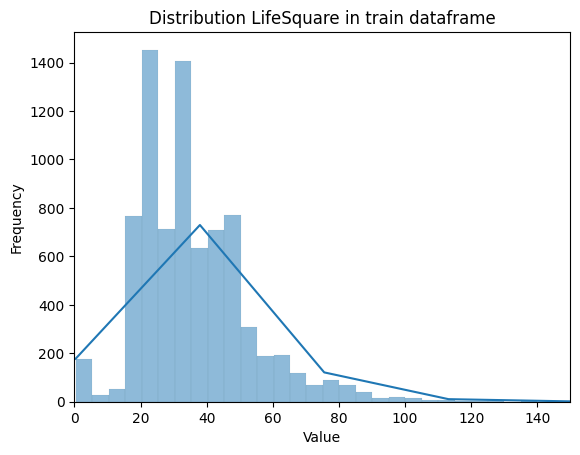

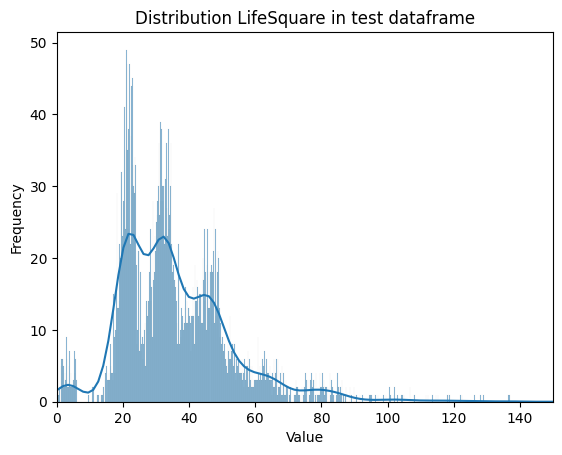

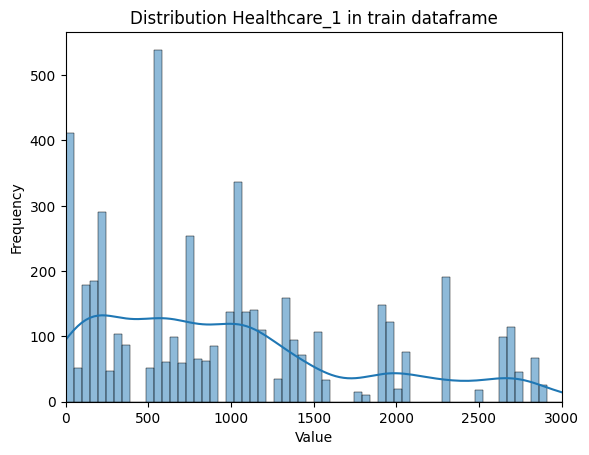

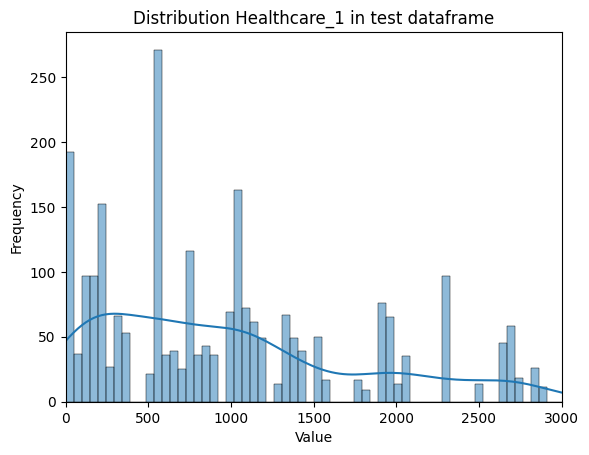

In [4]:
# Функция строящая диаграмму частоты значений признака
def plot_distribution(df, column_name, x_min=None, x_max=None, bins=100):
    fig, ax = plt.subplots()
    sns.histplot(df[column_name], kde=True, ax=ax, bins=bins)  # Добавили параметр bins
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'Distribution {column_name} in {df.index.name} dataframe')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    plt.show()

plot_distribution(train, 'LifeSquare', 0, 150, 1500)
plot_distribution(test, 'LifeSquare', 0, 150, 1500)
plot_distribution(train, 'Healthcare_1', 0, 3000)
plot_distribution(test, 'Healthcare_1', 0, 3000)

*Обращает на себя внимание тот факт, что переменная 'LifeSquare' обучающей выборки имеет явно рукотворный характер распределения, "квазиравномерный" далёкий от более стохастического "псевдонормального" присущего её тёзке из тестовой выборки. А вот распределение признака 'Healthcare_1' весьма схожее между обучающей и тестовой выборками. Это обстоятельство позволяет сделать предварительный вывод об их гомогенности.*

*Посмотрим на описательные статистики.*

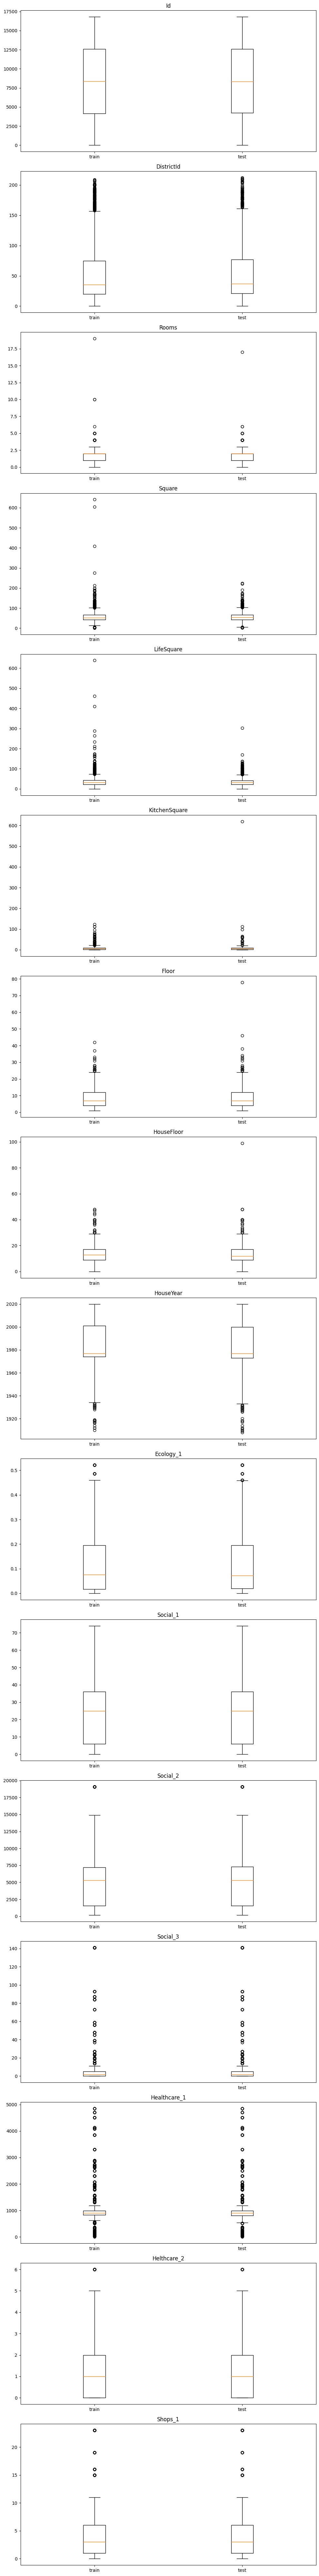

In [14]:
def compare_descriptive_stats(df1, df2):

  title1 = df1.index.name
  title2 = df2.index.name


  # Выбираем числовые столбцы
  numeric_columns = df2.select_dtypes(include='number').columns

  # Создаем фигуру и оси
  fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 5 * len(numeric_columns)))

  # Итерируем по числовым столбцам и строим диаграммы "ящик с усами" без включения значений NaN
  for i, column in enumerate(numeric_columns):
      axes[i].boxplot([df1[column].dropna(), df2[column].dropna()], labels=[title1, title2])
      axes[i].set_title(column)

  plt.tight_layout()
  plt.show()

compare_descriptive_stats(train, test)

Вызывают сомнение выбросы в обучающей выборке в районе 7500 кв. футов LifeSquare и в 2000 кв. футов KitchenSquare, при том что общая площадь (Square) не превышает 600 кв. футов. Точно так же вызывают сомнения значения 'HouseYear' и 'HouseFloor'.Избавимся от них. Тестовыую выборку оставим без изменений.

In [6]:
# Функция удаляющая случай наблюдения с максимальным значением по переменной
def remove_max_row(df, column_name):
    # Находим индекс строки с максимальным значением в указанном столбце
    max_index = df[column_name].idxmax()

    # Удаляем строку с найденным индексом
    df.drop(index=max_index, inplace=True)

    return df


# Удаляем строки с максимальным значением в вышеуказанных признаках, проверяя после каждого удаления диаграммы чтобы не переусердствовать
train = remove_max_row(train, 'LifeSquare')
train = remove_max_row(train, 'KitchenSquare')
train = remove_max_row(train, 'KitchenSquare')
train = remove_max_row(train, 'HouseYear')
train = remove_max_row(train, 'HouseYear')
train = remove_max_row(train, 'HouseFloor')
train = remove_max_row(train, 'HouseFloor')
train = remove_max_row(train, 'HouseFloor')

*Заполним пропущенные значения с использованием мер центральной тенденции.*

*Заменим пропущенные значения переменной "LifeSquare" датафрейма, вычисляя их на основе отношения "Square" к "LifeSquare" для аналогичного числа комнат. Возможно, это не самое лучшее решение, но вполне логичное для любого дома в любой стране.*

In [7]:
# Функция заменяющая пропущенные значения переменной
def fill_missing_lifesquare(df):
  # Создаем пустой словарь для хранения средних значений отношений "Square" к "LifeSquare" для каждого числа комнат
  room_ratios = {}

  # Проходим по строкам датафрейма, где значения "LifeSquare" не отсутствуют
  for i in df.index:
    if not pd.isna(df.loc[i, "LifeSquare"]):
      # Рассчитываем отношение "Square" к "LifeSquare"
      ratio = df.loc[i, "Square"] / df.loc[i, "LifeSquare"]
      # Добавляем отношение в словарь по числу комнат
      rooms = df.loc[i, "Rooms"]
      if rooms not in room_ratios:
        room_ratios[rooms] = []
      room_ratios[rooms].append(ratio)

  # Проходим по строкам датафрейма, где значения "LifeSquare" отсутствуют
  for i in df.index:
    if pd.isna(df.loc[i, "LifeSquare"]):
      # Получаем число комнат из текущей строки
      rooms = df.loc[i, "Rooms"]
      # Вычисляем среднее значение отношения для данного числа комнат
      avg_ratio = sum(room_ratios[rooms]) / len(room_ratios[rooms])
      # Вычисляем значение "LifeSquare" с учетом среднего отношения и известного значения "Square"
      df.loc[i, "LifeSquare"] = df.loc[i, "Square"] / avg_ratio

  return df

fill_missing_lifesquare(train)
fill_missing_lifesquare(test)

test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
test,,,,,,,,,,,,,,,,,,,
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,34.481397,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


*Заменим пропущенные значения переменной "Healthcare_1" медианным значением, как наиболее уместным.*

In [8]:
# Функция заменяющая пропущенные значения переменной медианными значениями
def fill_missing_healthcare_1(df):
  df["Healthcare_1"] = df["Healthcare_1"].fillna(df["Healthcare_1"].median())

fill_missing_healthcare_1(train)
fill_missing_healthcare_1(test)

test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
test,,,,,,,,,,,,,,,,,,,
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,900.0,0,0,B
1,15856,74,2.0,69.263183,34.481397,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,900.0,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,900.0,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,900.0,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,900.0,5,15,B


*Проверим наличие пропущенных значений.*

In [9]:
display(missing_values(train))
display(missing_values(test))

{'Total_train': 9992}

{'Total_test': 5000}

*Закодируем категориальные переменные в виде бинарных признаков.*

In [10]:
# Функция заменяющая категориальные признаки их бинарными наборами
def one_hot_encode_non_numeric(df):
  for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
      df = pd.get_dummies(df, columns=[column], prefix_sep='_')

  return df

train = one_hot_encode_non_numeric(train)
test = one_hot_encode_non_numeric(test)

test.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
test,,,,,,,,,,,,,,,,,,,,,,
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,900.0,0,0,False,True,False,True,False,True
1,15856,74,2.0,69.263183,34.481397,1.0,6,1.0,1977,0.075779,6,1437,3,900.0,0,2,False,True,False,True,False,True
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,30,7538,87,4702.0,5,5,False,True,False,True,False,True
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,900.0,3,3,False,True,False,True,False,True
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,2,629,1,900.0,0,0,False,True,False,True,True,False


*Использование шкалирования показалось мне излишним. Выигрыш времени будет мизерным, да он и не нужен - всё будет и так Turbo Quick (Hello, BASIC!). Переходим к нужным процедурам.*

In [11]:
# Разделение обучающей выборки на входные данные и целевую переменную
X = train.drop('Price', axis=1)
y = train['Price']

# Разделение обучающей выборки на train и valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

*Выберем самую "сложную" из допустимых заданием моделей.*

In [12]:
# Создание и обучение модели RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание цен на валидационной выборке
y_pred_valid = model.predict(X_valid)

# Вычисление метрики R2 для валидационной выборки
r2_valid = r2_score(y_valid, y_pred_valid)
print(f"R2: {100*r2_valid:.2f}%")

R2: 72.85%


*Мне как-то привычнее смотреть на коэффициент детерминации в процентах, прошу прощения за ригидность. Тем не менее порог 60% пройден с первого раза. А если всё хорошо зачем считать другие модели? Это не Statgraphics - в пару кликов модель не переделаешь.*

In [13]:
# Предсказание цен для тестовой выборки
y_pred_test = model.predict(test)

# Создание файла с предсказаниями
predictions = pd.DataFrame({"Id": test['Id'], "Price": y_pred_test})
predictions.to_csv("SPashkov_predictions.csv", index=False)

predictions

,Id,Price
test,,
0,725,158227.870723
1,15856,217682.077885
2,5480,190493.247118
3,15664,352323.391082
4,14275,143111.224929
...,...,...
4995,8180,245426.423075
4996,4695,135739.033413
4997,5783,334936.563561


*DIXI*